In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer # for scoring during cross validation
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay # draws a confusion matrix
from sklearn.metrics import (accuracy_score, log_loss, classification_report)

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.inspection import permutation_importance

In [4]:
df = pd.read_csv('IBMdataCleaning.csv')
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,1,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,No,2,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,Yes,1,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,No,2,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,4,27,No,1,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df['Attrition'].value_counts() #sample balance exploration

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [6]:
df.shape

(1470, 34)

In [7]:
# Set options to inspect all of the columns
pd.options.display.max_columns = 36 

# Inspect the structure of the dataframe
df.sample(5).transpose()

,611,20,934,947,143
Unnamed: 0,611,20,934,947,143
Age,35,24,25,52,30
Attrition,No,No,No,Yes,No
BusinessTravel,1,0,1,1,1
DailyRate,950,673,266,1030,438
Department,Research & Development,Research & Development,Research & Development,Sales,Research & Development
DistanceFromHome,7,11,1,5,18
Education,3,2,3,3,3
EducationField,Other,Other,Medical,Life Sciences,Life Sciences
EmployeeCount,1,1,1,1,1


In [8]:
df.describe(include="all")

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,2,NaN,NaN,3,NaN,NaN,6,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1233,NaN,NaN,961,NaN,NaN,606,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,734.500000,36.923810,NaN,1.086395,802.485714,NaN,9.192517,2.912925,NaN,1.0,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,NaN,0.532170,403.509100,NaN,8.106864,1.024165,NaN,0.0,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,NaN,0.000000,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,NaN,1.000000,465.000000,NaN,2.000000,2.000000,NaN,1.0,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,NaN,1.000000,802.000000,NaN,7.000000,3.000000,NaN,1.0,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,NaN,1.000000,1157.000000,NaN,14.000000,4.000000,NaN,1.0,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


### Data Cleaning

In [9]:
df = pd.get_dummies(df, columns=['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', ], drop_first=True) 

In [10]:
# Drop useless features and rename the dataframe
df2= df.drop(labels = ['StandardHours','EmployeeCount'], axis = 1)
# df2 = df.drop(labels = ['Over18','StandardHours','EmployeeCount'], axis = 1)

In [11]:
df2.head()

,Unnamed: 0,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,...,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,...,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
1,1,49,2,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,...,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False
2,2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,...,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,True
3,3,33,2,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,...,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True
4,4,27,1,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,...,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False


### Data Processing

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df2.drop('Attrition_Yes', axis=1)
y = df2['Attrition_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2407, shuffle=True)



### Feature Scaling
##### The scikit library provides various types of scalers including MinMax Scaler and the StandardScaler. Below we will use the StandardScaler to scale the data.The scikit library provides various types of scalers including MinMax Scaler and the StandardScaler. Below we will use the StandardScaler to scale the data.

In [13]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Handling imbalanced dataset
##### We have a imbalanced dataset with majority of observations being of one type ('No' which is '0' in the dataset) in our case. We have about 84 % of observations having 'No' and only 16 % of 'Yes' and hence this is an imbalanced dataset. To deal with such a imbalanced dataset we have to take certain measures, otherwise the performance of our model can be significantly affected. We have two approaches to curb such datasets: oversampling, which increase the number of observations corresponding to the minority class, or undersampling which decrease the number of observations for the majority class. Below I have used an oversampling technique known as the SMOTE(Synthetic Minority Oversampling Technique) which randomly creates some 'Synthetic' instances of the minority class so that the net observations of both the class get balanced out.

### Smote
###### If you're using SMOTE, you should have 4 variables to use to train/test your model: X_smote_train, y_smote_train, X_test, y_test
###### If you're using ADASYN, you should have 4 variables to use to train/test your model: X_adasyn_train: y_adasyn_train" X_test" y_test

In [14]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=2407)
X_smote_train, y_smote_train = oversampler.fit_resample(X_train, y_train)

In [15]:
from imblearn.over_sampling import ADASYN
oversampler = ADASYN(random_state=2407)
X_adasyn_train, y_adasyn_train = oversampler.fit_resample(X_train, y_train)

### Evaluate Function 

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [17]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

### 1. Model: Gradient Boost

##### Gradient Boosting is also an ensemble technique much like the Random Forest where a combination of weak Tree learners are brought together to form a relatively stronger learner. The technique involves defining some sort of function (loss function) that you want minimised and an method/algorithm to minimise this. Therefore as the name suggests, the algorithm used to minimise the loss function is that of a gradient descent method which adds decision trees which "point" in the direction that reduces our loss function (downward gradient).

##### To set up a Gradient Boosting classifier is easy enough in Sklearn and it involves only a handful of lines of code. Again we first set up our classifier's parameters



In [18]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix

### Testset Function

In [20]:
def classification_all_features(Model, X_train, y_train):
    """
    This function apply machine learning algorithms into the all features in the dataset and 
    returns confusion matrix and f1 score which will be used in models comparison.
    """

    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = model.predict(X_test)
    
    global score
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    # Printing evaluation metric (f1-score) 
    print("Testet f1 score: {:.3f}".format(score))
    ### print(f"Train Score: {f1_score(y_test, y_pred, average='weighted'):.3f}")

    # Making the Confusion Matrix
    print(confusion_matrix(y_test, y_pred))

### 1.1. TestSet Score and Confusion Matrix

In [21]:
# Function for Gradient Boosting Classifier with all features
classification_all_features(GradientBoostingClassifier(),X_train, y_train)

Testet f1 score: 0.848
[[243   6]
 [ 32  13]]


In [104]:
#[TP, FP
# FN, TN]
# TP(Attrition- Predict: NO & Actual NO)= 243
# FN(Attrition- Predict: Yes & Actual NO)= 32
# * FP(Attrition- Predict: NO & Actual Yes)= 6 
# * TN(Attrition- Predict: Yes & Actual Yes)= 13  
# * Precision = TP/(TP+FP) = 243/(243+6) = 0.9759036144578314
# Recall = TP+(TP+FN) = 243/(243+32) = 0.8836363636363637
# F1 Score = 2* (Precision*Recall)/(Precision+Recall)
# * True negative rate = TN/(TN+FP)=  13/(13+6) = 0.6842105263157895 (because we want to predict attrition = Yes)

In [22]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

evaluate(gb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[984   0]
 [ 49 143]]
ACCURACY SCORE:
0.9583
CLASSIFICATION REPORT:
                False        True  accuracy    macro avg  weighted avg
precision    0.952565    1.000000  0.958333     0.976283      0.960310
recall       1.000000    0.744792  0.958333     0.872396      0.958333
f1-score     0.975706    0.853731  0.958333     0.914719      0.955792
support    984.000000  192.000000  0.958333  1176.000000   1176.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[243   6]
 [ 32  13]]
ACCURACY SCORE:
0.8707
CLASSIFICATION REPORT:
                False       True  accuracy   macro avg  weighted avg
precision    0.883636   0.684211  0.870748    0.783923      0.853112
recall       0.975904   0.288889  0.870748    0.632396      0.870748
f1-score     0.927481   0.406250  0.870748    0.666865      0.847701
support    249.000000  45.000000  0.870748  294.000000    294.000000


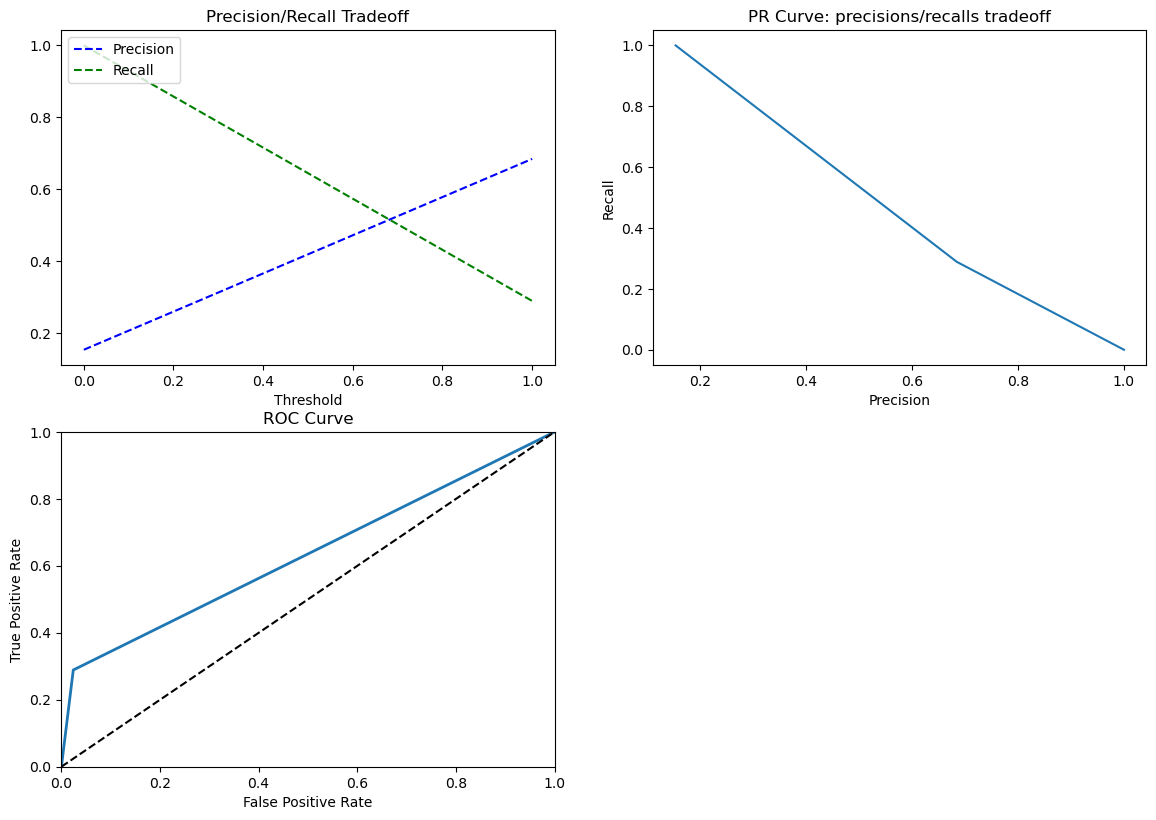

In [27]:
precisions, recalls, thresholds = precision_recall_curve(y_test, gb_clf.predict(X_test))
plt.figure(figsize=(14, 20))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, gb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

### Using Smote for Gradient Boost

In [28]:
classification_all_features(GradientBoostingClassifier(),X_smote_train, y_smote_train) # after smoke

Testet f1 score: 0.834
[[238  11]
 [ 32  13]]


In [29]:
gb_clf_smote = GradientBoostingClassifier()
gb_clf_smote.fit(X_smote_train, y_smote_train)

evaluate(gb_clf_smote, X_smote_train, X_test, y_smote_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[978   6]
 [ 55 929]]
ACCURACY SCORE:
0.9690
CLASSIFICATION REPORT:
                False        True  accuracy    macro avg  weighted avg
precision    0.946757    0.993583  0.969004     0.970170      0.970170
recall       0.993902    0.944106  0.969004     0.969004      0.969004
f1-score     0.969757    0.968213  0.969004     0.968985      0.968985
support    984.000000  984.000000  0.969004  1968.000000   1968.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[238  11]
 [ 33  12]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
                False       True  accuracy   macro avg  weighted avg
precision    0.878229   0.521739   0.85034    0.699984      0.823664
recall       0.955823   0.266667   0.85034    0.611245      0.850340
f1-score     0.915385   0.352941   0.85034    0.634163      0.829296
support    249.000000  45.000000   0.85034  294.000000    294.000000


### 2. Gradient Boosting Classification with Hyperparameter Tuning (all features)

In [120]:
# Setting Parameters
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 2,
    'min_samples_leaf': 3,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : 0
}

# Instantiate Gradient Boosting classifier: gb
gb = GradientBoostingClassifier(**gb_params)

# Fit to the training set
gb.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = gb.predict(X_test)

# Assigning f1 score to a variable & Printing evaluation metric (f1-score) 
print(f"Train Score: {f1_score(y_test, y_pred, average='weighted'):.3f}")

confusion_matrix(y_test, y_pred)

Train Score: 0.847


array([[237,  12],
       [ 29,  16]])

In [119]:
# TP(Attrition- Predict: NO & Actual NO)= 237
# FN(Attrition- Predict: Yes & Actual NO)= 29
# * FP(Attrition- Predict: NO & Actual Yes)= 12
# * TN(Attrition- Predict: Yes & Actual Yes)= 16
# * Precision = TP/(TP+FP) = 237/(237+12) = 0.9518072289156626
# Recall = TP+(TP+FN) = 237/(237+29) = 0.8909774436090225
# F1 Score = 2* (Precision*Recall)/(Precision+Recall)
# * True negative rate = TN/(TN+FP)=  16/(16+12) = 0.5714285714285714 (because we want to predict attrition = Yes)

In [123]:
gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(X_smote_train, y_smote_train)
# Get our predictions
gb_predictions = gb.predict(X_test)
print("Predictions have finished")

Predictions have finished


### 2.1. XGBoost

In [32]:
import xgboost as xgb
from xgboost import XGBClassifier

In [34]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[984   0]
 [  0 192]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
           False   True  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    984.0  192.0       1.0     1176.0        1176.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[240   9]
 [ 34  11]]
ACCURACY SCORE:
0.8537
CLASSIFICATION REPORT:
                False       True  accuracy   macro avg  weighted avg
precision    0.875912   0.550000  0.853741    0.712956      0.826028
recall       0.963855   0.244444  0.853741    0.604150      0.853741
f1-score     0.917782   0.338462  0.853741    0.628122      0.829111
support    249.000000  45.000000  0.853741  294.000000    294.000000


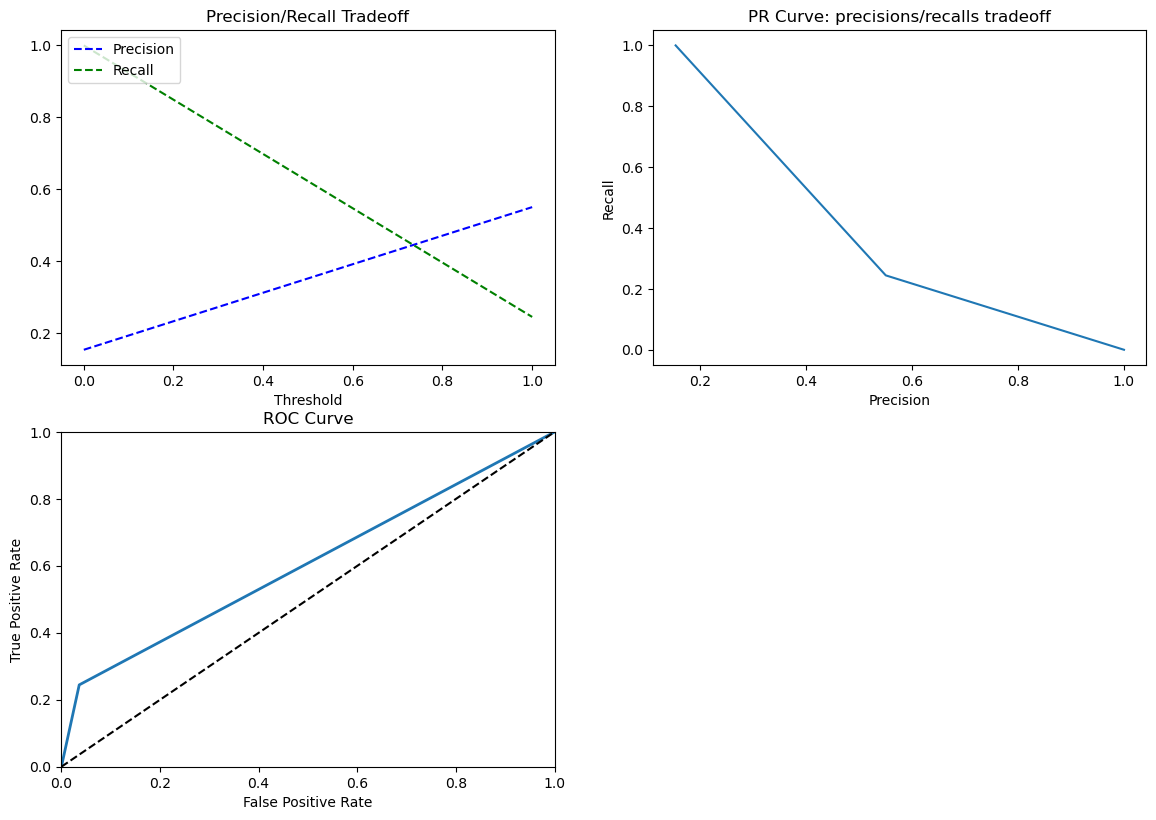

In [36]:
precisions, recalls, thresholds = precision_recall_curve(y_test, xgb_clf.predict(X_test))
plt.figure(figsize=(14, 20))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

### 3.1 ADABoost

In [37]:
# Function for ADA Boost Classifier with all features
classification_all_features(AdaBoostClassifier(),X_train, y_train)

Testet f1 score: 0.864
[[245   4]
 [ 30  15]]


In [38]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)

evaluate(ada_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[965  19]
 [ 90 102]]
ACCURACY SCORE:
0.9073
CLASSIFICATION REPORT:
                False        True  accuracy    macro avg  weighted avg
precision    0.914692    0.842975  0.907313     0.878834      0.902983
recall       0.980691    0.531250  0.907313     0.755971      0.907313
f1-score     0.946542    0.651757  0.907313     0.799150      0.898414
support    984.000000  192.000000  0.907313  1176.000000   1176.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[245   4]
 [ 30  15]]
ACCURACY SCORE:
0.8844
CLASSIFICATION REPORT:
                False       True  accuracy   macro avg  weighted avg
precision    0.890909   0.789474  0.884354    0.840191      0.875383
recall       0.983936   0.333333  0.884354    0.658635      0.884354
f1-score     0.935115   0.468750  0.884354    0.701932      0.863732
support    249.000000  45.000000  0.884354  294.000000    294.000000


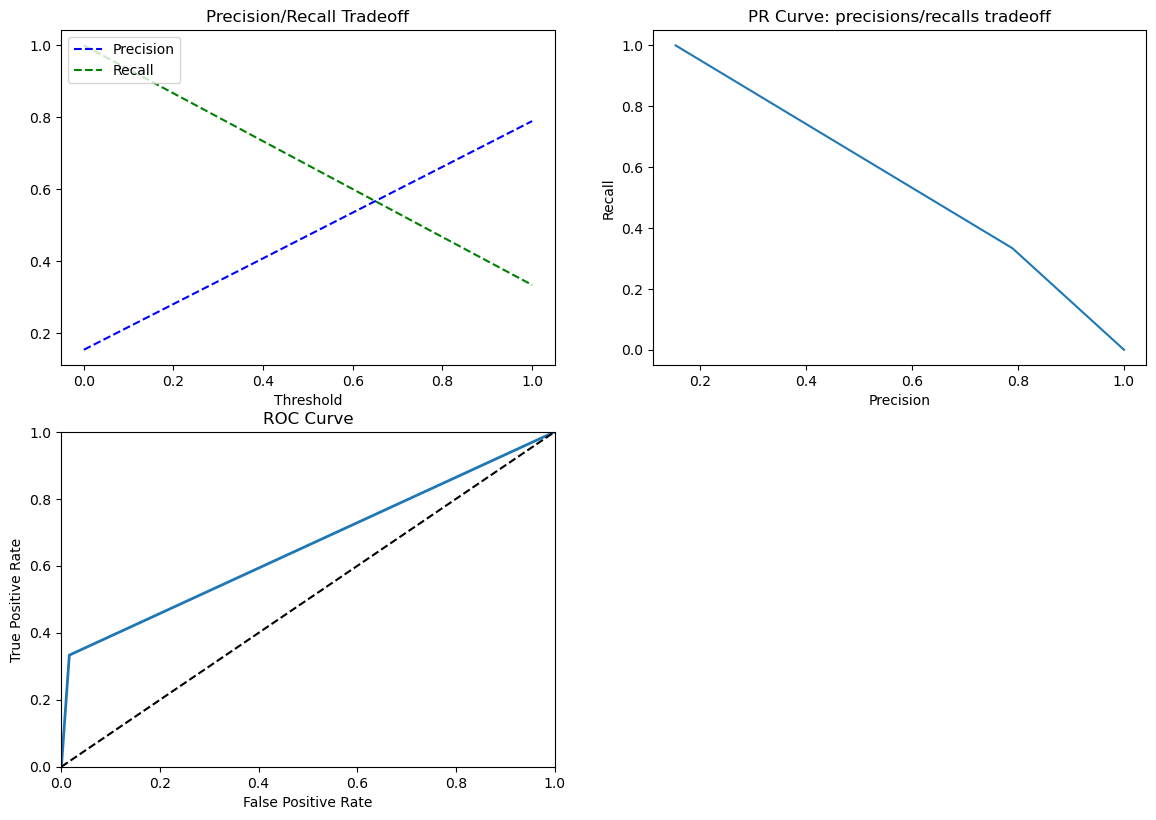

In [39]:
precisions, recalls, thresholds = precision_recall_curve(y_test, ada_clf.predict(X_test))
plt.figure(figsize=(14, 20))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, ada_clf.predict(X_test))
plot_roc_curve(fpr, tpr)